# Exploratory Data Analysis (EDA) for the startup success dataset.

In [ ]:
# install pycaret
!pip install pycaret

# 1. Data Loading and Inspection


In [1]:
import pandas as pd

# mount google drive
from google.colab import drive
drive.mount("/content/gdrive")
startup_data_fpath = '/content/gdrive/MyDrive/Sem-I/CMPE-255 Data Mining/Assignments5/Task1/big_startup_secsees_dataset.csv'

Mounted at /content/gdrive


In [2]:
# read data
import pandas as pd
startup_data = pd.read_csv(startup_data_fpath)

# check data
startup_data.shape

(17305, 14)

In [ ]:
# Displaying the data types of each column and basic statistics
data_info = startup_data.info()
data_description = startup_data.describe(include='all')

data_info, data_description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17305 entries, 0 to 17304
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   permalink          17305 non-null  object
 1   name               17305 non-null  object
 2   homepage_url       15996 non-null  object
 3   category_list      16511 non-null  object
 4   funding_total_usd  17305 non-null  object
 5   status             17305 non-null  object
 6   country_code       15601 non-null  object
 7   state_code         15173 non-null  object
 8   region             15321 non-null  object
 9   city               15321 non-null  object
 10  funding_rounds     17305 non-null  int64 
 11  founded_at         13354 non-null  object
 12  first_funding_at   17298 non-null  object
 13  last_funding_at    17305 non-null  object
dtypes: int64(1), object(13)
memory usage: 1.8+ MB


(None,
                   permalink   name         homepage_url  category_list  \
 count                 17305  17305                15996          16511   
 unique                17305  17246                15973           7813   
 top     /organization/-fame  Blink  http://www.beva.com  Biotechnology   
 freq                      1      4                    3           1175   
 mean                    NaN    NaN                  NaN            NaN   
 std                     NaN    NaN                  NaN            NaN   
 min                     NaN    NaN                  NaN            NaN   
 25%                     NaN    NaN                  NaN            NaN   
 50%                     NaN    NaN                  NaN            NaN   
 75%                     NaN    NaN                  NaN            NaN   
 max                     NaN    NaN                  NaN            NaN   
 
        funding_total_usd     status country_code state_code       region  \
 count        

## 2. Data Cleaning

In [ ]:
# Check for missing values in each column
missing_values = startup_data.isnull().sum()

# Calculate the percentage of missing values for each column
missing_percentage = (startup_data.isnull().sum() / len(startup_data)) * 100

missing_info = pd.DataFrame({"Missing Values": missing_values, "Percentage": missing_percentage})
missing_info.sort_values(by="Percentage", ascending=False)


,Missing Values,Percentage
founded_at,3951,22.831552
state_code,2132,12.320139
region,1984,11.464895
city,1984,11.464895
country_code,1704,9.846865
homepage_url,1309,7.564288
category_list,794,4.588269
first_funding_at,7,0.040451
permalink,0,0.000000
name,0,0.000000


In [ ]:
# Handling missing values based on the proposed strategy

# Imputing missing values with "Unknown"
cols_fill_unknown = ['founded_at', 'state_code', 'region', 'city', 'country_code', 'homepage_url', 'category_list']
for col in cols_fill_unknown:
    startup_data[col].fillna('Unknown', inplace=True)

# Drop rows with missing values in 'first_funding_at' and 'name'
startup_data.dropna(subset=['first_funding_at', 'name'], inplace=True)

# Check the updated missing values count
updated_missing_values = startup_data.isnull().sum()
updated_missing_values


permalink            0
name                 0
homepage_url         0
category_list        0
funding_total_usd    0
status               0
country_code         0
state_code           0
region               0
city                 0
funding_rounds       0
founded_at           0
first_funding_at     0
last_funding_at      0
dtype: int64

In [ ]:
# Converting 'funding_total_usd' to numeric, setting errors='coerce' to replace non-numeric values with NaN
startup_data['funding_total_usd'] = pd.to_numeric(startup_data['funding_total_usd'], errors='coerce')

# Imputing NaN values in 'funding_total_usd' with the median
median_funding = startup_data['funding_total_usd'].median()
startup_data['funding_total_usd'].fillna(median_funding, inplace=True)

# Checking the number of missing values after imputation for the 'funding_total_usd' column
missing_values_funding = startup_data['funding_total_usd'].isnull().sum()

missing_values_funding

0

In [ ]:
# Converting date columns to datetime format
date_columns = ['founded_at', 'first_funding_at', 'last_funding_at']
startup_data[date_columns] = startup_data[date_columns].apply(pd.to_datetime, errors='coerce', format='%Y-%m-%d')

# Checking the data types after conversion
date_column_dtypes = startup_data[date_columns].dtypes

date_column_dtypes

founded_at          datetime64[ns]
first_funding_at    datetime64[ns]
last_funding_at     datetime64[ns]
dtype: object

In [ ]:
# Checking for duplicate rows based on all columns
initial_row_count = startup_data.shape[0]
startup_data.drop_duplicates(inplace=True)
remaining_row_count = startup_data.shape[0]

# Calculating the number of rows removed
rows_removed = initial_row_count - remaining_row_count

rows_removed

0

In [ ]:
# Convert 'funding_total_usd' column to numeric, setting errors='coerce' to handle non-numeric values
startup_data['funding_total_usd'] = pd.to_numeric(startup_data['funding_total_usd'], errors='coerce')

# Convert date columns to datetime data type
date_columns = ['founded_at', 'first_funding_at', 'last_funding_at']
for col in date_columns:
    # Convert only valid date strings to datetime, setting errors='coerce' to handle invalid dates
    startup_data[col] = pd.to_datetime(startup_data[col], errors='coerce')

# Check updated data types of the columns
updated_data_types = startup_data.dtypes
updated_data_types


permalink                    object
name                         object
homepage_url                 object
category_list                object
funding_total_usd           float64
status                       object
country_code                 object
state_code                   object
region                       object
city                         object
funding_rounds                int64
founded_at           datetime64[ns]
first_funding_at     datetime64[ns]
last_funding_at      datetime64[ns]
dtype: object

### Handling Outliers


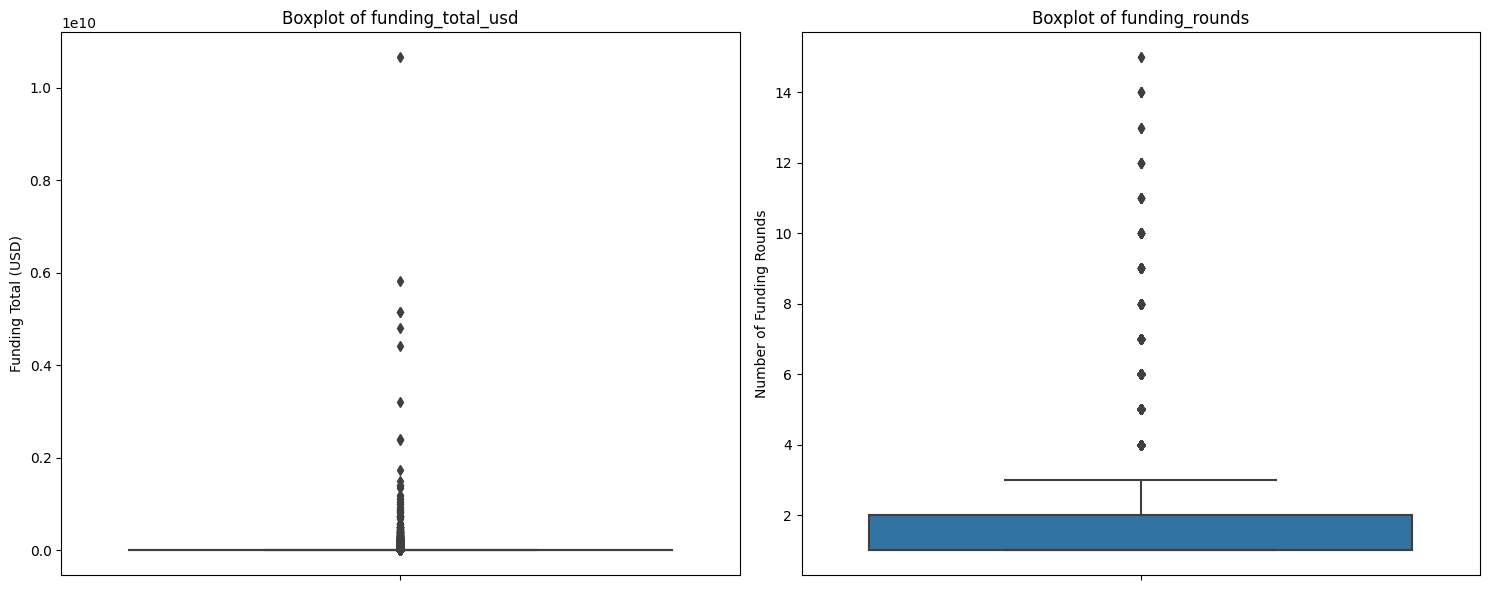

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Plotting boxplot for funding_total_usd
sns.boxplot(y=startup_data['funding_total_usd'], ax=ax[0])
ax[0].set_title('Boxplot of funding_total_usd')
ax[0].set_ylabel('Funding Total (USD)')

# Plotting boxplot for funding_rounds
sns.boxplot(y=startup_data['funding_rounds'], ax=ax[1])
ax[1].set_title('Boxplot of funding_rounds')
ax[1].set_ylabel('Number of Funding Rounds')

plt.tight_layout()
plt.show()


In [ ]:
# Define a function to remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out the outliers
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df_filtered

# Remove outliers for the specified columns
startup_df_cleaned = remove_outliers(startup_data, 'funding_total_usd')
startup_df_cleaned = remove_outliers(startup_df_cleaned, 'funding_rounds')

# Shape of the dataframe before and after removing outliers
original_shape = startup_data.shape
cleaned_shape = startup_df_cleaned.shape

original_shape, cleaned_shape


((17298, 14), (14046, 14))

## 3. Data Transformation

To begin with, a potentially useful feature could be the "age" of the startup, which can be derived from the founded_at column. This will give us the number of years since the startup was founded.

Another useful feature could be the "duration between first and last funding", which can provide insights into how long startups take between their first and last funding rounds.

In [ ]:
# Calculating the age of the startup (in years)
current_year = pd.Timestamp.now().year
startup_data['age'] = current_year - startup_data['founded_at'].dt.year

# Calculating the duration between first and last funding (in days)
startup_data['funding_duration'] = (startup_data['last_funding_at'] - startup_data['first_funding_at']).dt.days

# Displaying the first few rows with the new features
startup_data[['name', 'founded_at', 'age', 'first_funding_at', 'last_funding_at', 'funding_duration']].head()


,name,founded_at,age,first_funding_at,last_funding_at,funding_duration
0,#fame,NaT,NaN,2015-01-05,2015-01-05,0.0
1,:Qounter,2014-09-04,9.0,2014-03-01,2014-10-14,227.0
2,"(THE) ONE of THEM,Inc.",NaT,NaN,2014-01-30,2014-01-30,0.0
3,0-6.com,2007-01-01,16.0,2008-03-19,2008-03-19,0.0
4,004 Technologies,2010-01-01,13.0,2014-07-24,2014-07-24,0.0


In [ ]:
## 4. Data Visualization

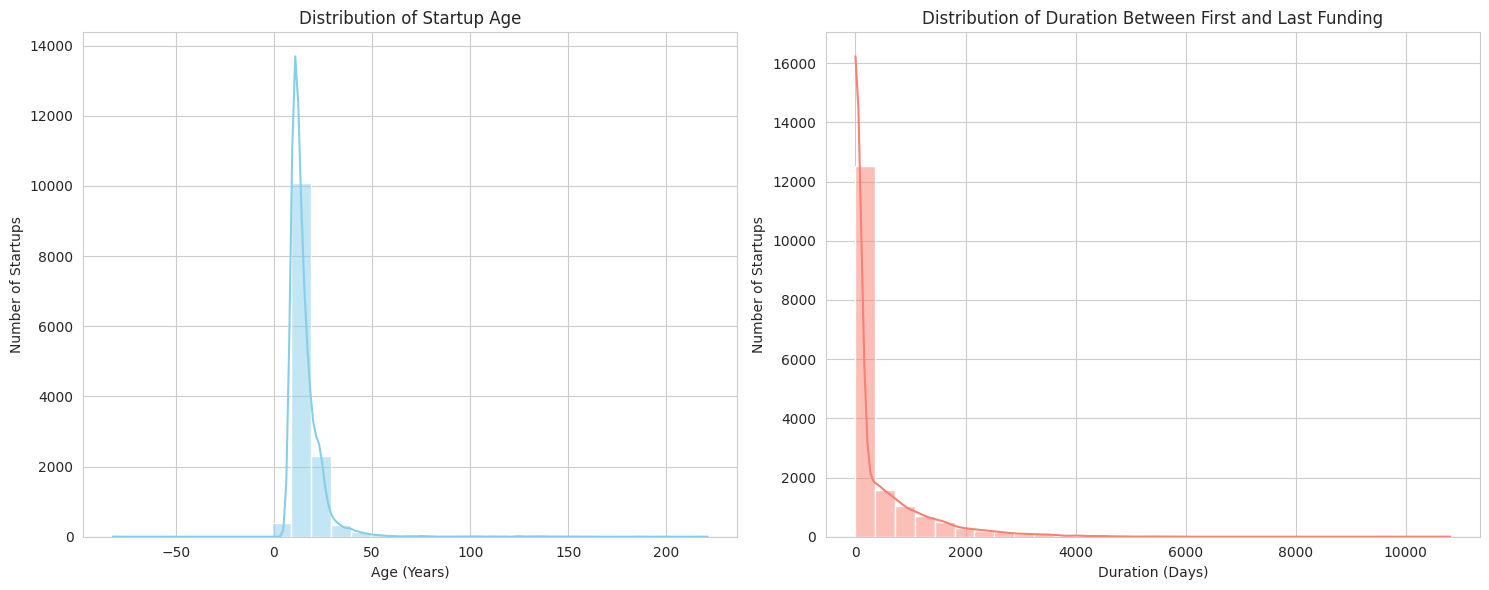

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the visualization style
sns.set_style("whitegrid")

# Initializing the figure
plt.figure(figsize=(15, 6))

# Plotting the distribution for 'age' and 'funding_duration'
plt.subplot(1, 2, 1)
sns.histplot(startup_data['age'], bins=30, color="skyblue", kde=True)
plt.title('Distribution of Startup Age')
plt.xlabel('Age (Years)')
plt.ylabel('Number of Startups')

plt.subplot(1, 2, 2)
sns.histplot(startup_data['funding_duration'], bins=30, color="salmon", kde=True)
plt.title('Distribution of Duration Between First and Last Funding')
plt.xlabel('Duration (Days)')
plt.ylabel('Number of Startups')

plt.tight_layout()
plt.show()

Distribution of Startup Age:
- Most startups in the dataset are relatively young, with a significant number being between 0 to 10 years old.
- There is a long tail, indicating that a few startups have been around for several decades.

Distribution of Duration Between First and Last Funding:
- A significant number of startups have a duration of zero days, indicating they received their first and last funding on the same day.
- For others, the duration varies widely, with some startups taking several years between their first and last funding rounds.

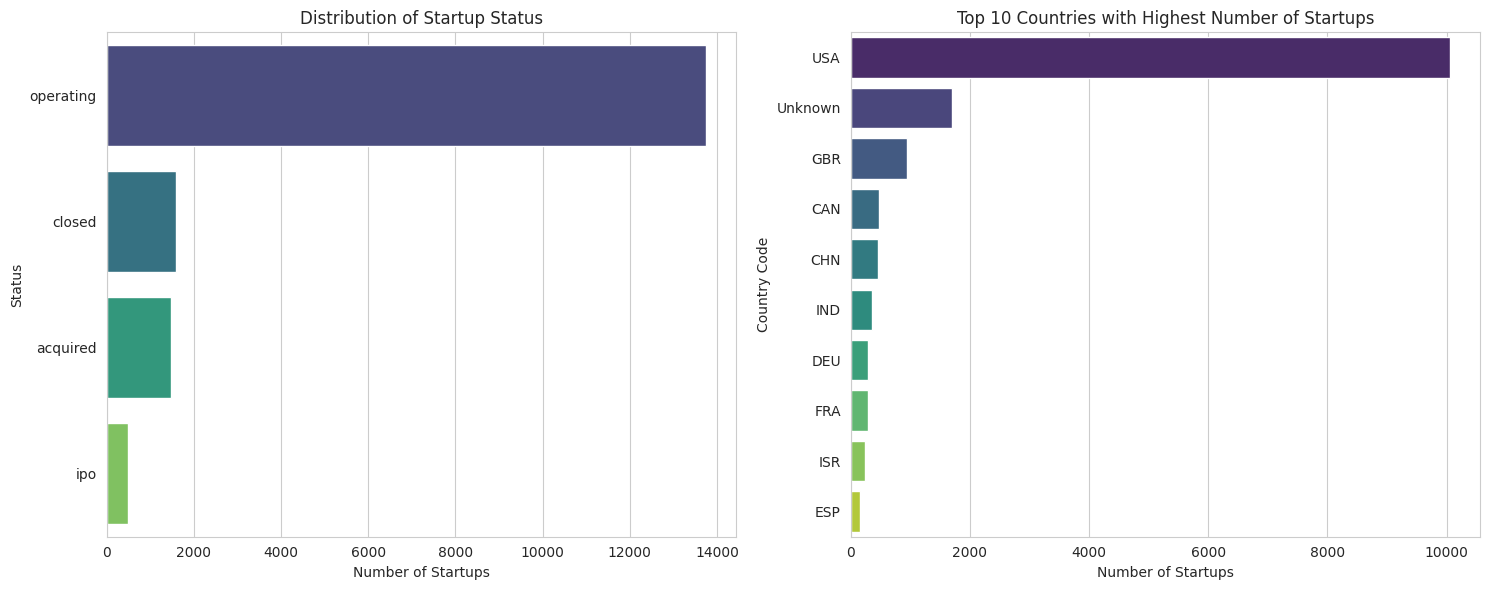

In [ ]:
# Initializing the figure
plt.figure(figsize=(15, 6))

# Plotting the distribution for 'status'
plt.subplot(1, 2, 1)
sns.countplot(y=startup_data['status'], order=startup_data['status'].value_counts().index, palette="viridis")
plt.title('Distribution of Startup Status')
plt.xlabel('Number of Startups')
plt.ylabel('Status')

# Plotting the top 10 countries with the highest number of startups
plt.subplot(1, 2, 2)
top_countries = startup_data['country_code'].value_counts().head(10).index
sns.countplot(y=startup_data[startup_data['country_code'].isin(top_countries)]['country_code'],
              order=top_countries, palette="viridis")
plt.title('Top 10 Countries with Highest Number of Startups')
plt.xlabel('Number of Startups')
plt.ylabel('Country Code')

plt.tight_layout()
plt.show()


Distribution of Startup Status:
- A significant majority of startups in the dataset are in the "operating" status.
- There are also a noticeable number of startups that have been acquired or have closed down. A smaller fraction have an IPO status, indicating they've gone public.

Top Countries with the Highest Number of Startups:
- The USA dominates with the highest number of startups, followed by countries like the UK, CAN (Canada), IND (India), and others.

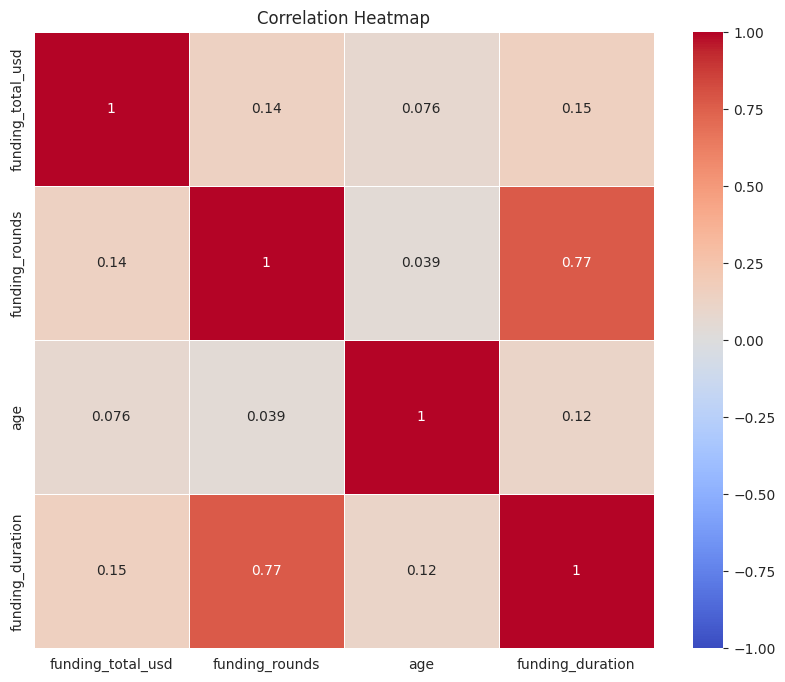

In [ ]:
# Calculating the correlation matrix
correlation_matrix = startup_data[['funding_total_usd', 'funding_rounds', 'age', 'funding_duration']].corr()

# Plotting the heatmap for correlation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


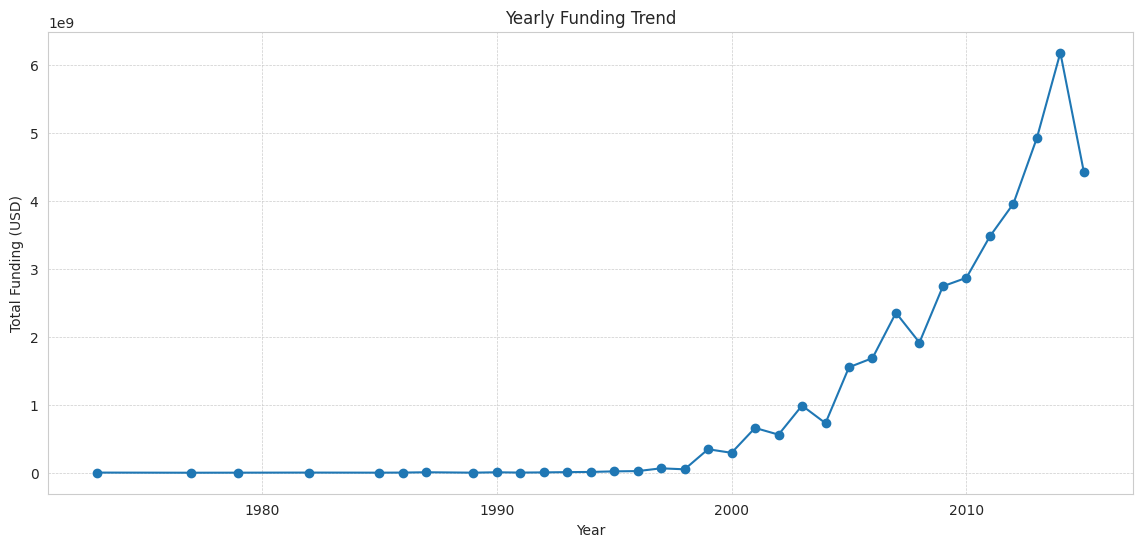

In [ ]:
# Extract the year from the 'first_funding_at' column
startup_df_cleaned['funding_year'] = startup_df_cleaned['first_funding_at'].dt.year

# Aggregate the total funding by year
yearly_funding = startup_df_cleaned.groupby('funding_year')['funding_total_usd'].sum()

# Plotting the yearly funding trend
plt.figure(figsize=(14, 6))
yearly_funding.plot(kind='line', marker='o')
plt.title('Yearly Funding Trend')
plt.xlabel('Year')
plt.ylabel('Total Funding (USD)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


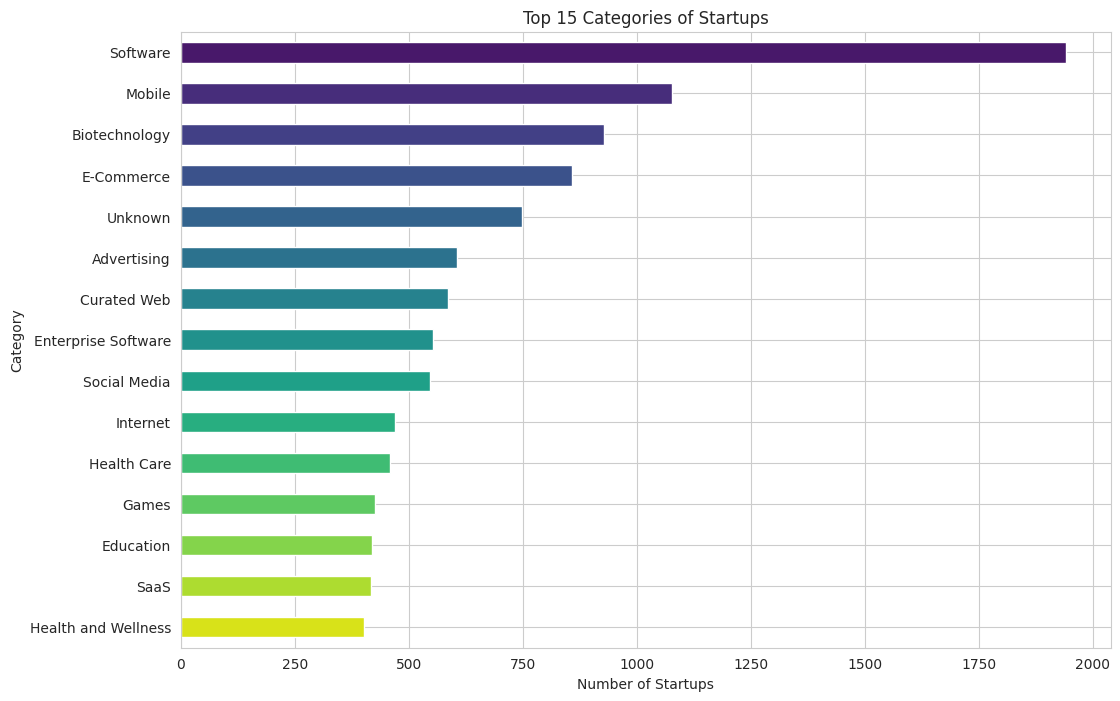

In [ ]:
# Splitting the 'category_list' column to get individual categories
all_categories = startup_df_cleaned['category_list'].str.split('|', expand=True).stack()

# Counting occurrences of each category
top_categories = all_categories.value_counts().head(15)

# Plotting the top categories of startups
plt.figure(figsize=(12, 8))
top_categories.plot(kind='barh', color=sns.color_palette('viridis', 15))
plt.title('Top 15 Categories of Startups')
plt.xlabel('Number of Startups')
plt.ylabel('Category')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()


In [ ]:
startup_df_cleaned.describe

<bound method NDFrame.describe of                                  permalink                    name  \
0                      /organization/-fame                   #fame   
1                   /organization/-qounter                :Qounter   
2      /organization/-the-one-of-them-inc-  (THE) ONE of THEM,Inc.   
3                    /organization/0-6-com                 0-6.com   
4           /organization/004-technologies        004 Technologies   
...                                    ...                     ...   
17299      /organization/eden-therapeutics       Eden Therapeutics   
17300               /organization/edenbase                Edenbase   
17301            /organization/edenbee-com             Edenbee.com   
17302      /organization/edenbrook-limited       Edenbrook Limited   
17303                 /organization/edenes                  edenes   

                            homepage_url  \
0                     http://livfame.com   
1                 http://www.qounter.

In [ ]:
# import pycaret clustering
from pycaret.classification import *
setup(startup_data, target='status')

,Description,Value
0,Session id,4009
1,Target,status
2,Target type,Multiclass
3,Target mapping,"acquired: 0, closed: 1, ipo: 2, operating: 3"
4,Original data shape,"(17298, 16)"
5,Transformed data shape,"(17298, 19)"
6,Transformed train set shape,"(12108, 19)"
7,Transformed test set shape,"(5190, 19)"
8,Numeric features,4
9,Date features,3


### Evaluate multiple machine learning models

In [ ]:
best_models = compare_models(n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7948,0.6221,0.7948,0.6318,0.7040,0.0000,0.0000,4.4300
dummy,Dummy Classifier,0.7948,0.5000,0.7948,0.6318,0.7040,0.0000,0.0000,0.5850
xgboost,Extreme Gradient Boosting,0.0282,0.6350,0.0282,0.0008,0.0016,0.0000,0.0000,0.7990


Processing:   0%|          | 0/67 [00:00<?, ?it/s]